# Multi-Layer Perceptron 



In [40]:
import tensorflow as tf 
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler 
import pandas as pd
import seaborn as sns 

# Load tips dataset
tips = sns.load_dataset('tips')

#  preprocessing 
# converting categorical variables to dummy variables
tips = pd.get_dummies(tips, drop_first=True)

# selecting feature and target (predicting 'tip' based on other feature)
X = tips.drop('tip', axis=1)
y = tips['tip']

# Splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
                                                     random_state=42)

# Standarizing the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test= scaler.transform(X_test)

# Bulid the model
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(64, activation='relu',
                           input_shape=(X_train.shape[1],)), #input Layer 
    
    tf.keras.layers.Dense(32, activation='relu'), # Hidden Layer
    
    tf.keras.layers.Dense(1) # output layer for regression 
])
#compile the model 
model.compile(optimizer='adam', loss='mean_squared_error',  metrics=['mae']
    
              )

# train the model
model.fit(X_train, y_train, epochs=100, batch_size=32, verbose=1)
 
# evaluate the model (using Mean squared Error)
loss = model.evaluate(X_test, y_test, verbose=0)
print('Mean Squared Error', loss[0])


Epoch 1/100
7/7 [==============================] - 1s 3ms/step - loss: 11.8617 - mae: 3.0992
Epoch 2/100
7/7 [==============================] - 0s 4ms/step - loss: 9.3895 - mae: 2.6755
Epoch 3/100
7/7 [==============================] - 0s 4ms/step - loss: 7.3973 - mae: 2.2745
Epoch 4/100
7/7 [==============================] - 0s 3ms/step - loss: 5.6980 - mae: 1.8968
Epoch 5/100
7/7 [==============================] - 0s 3ms/step - loss: 4.2281 - mae: 1.5578
Epoch 6/100
7/7 [==============================] - 0s 3ms/step - loss: 3.0845 - mae: 1.2859
Epoch 7/100
7/7 [==============================] - 0s 4ms/step - loss: 2.2552 - mae: 1.0865
Epoch 8/100
7/7 [==============================] - 0s 3ms/step - loss: 1.8368 - mae: 1.0062
Epoch 9/100
7/7 [==============================] - 0s 3ms/step - loss: 1.6506 - mae: 0.9732
Epoch 10/100
7/7 [==============================] - 0s 3ms/step - loss: 1.5458 - mae: 0.9484
Epoch 11/100
7/7 [==============================] - 0s 3ms/step - loss: 1.4256

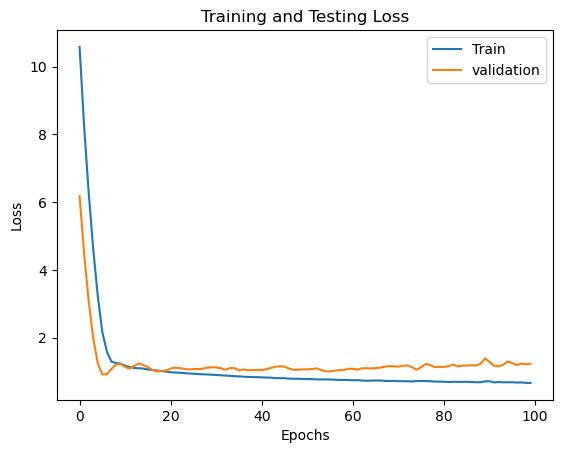

In [41]:
# Building the model 

model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(64, activation='relu',
                           input_shape=(X_train.shape[1],)), #input Layer 
    
    tf.keras.layers.Dense(32, activation='relu'), # Hidden Layer
    
    tf.keras.layers.Dense(1) # output layer for regression
])

# compile the model 
model.compile(optimizer='adam', loss='mean_squared_error')

# train the model and plot the training and testing loass and accuracy at each epoch
history = model.fit(X_train, y_train, epochs=100, batch_size=32, verbose=0,validation_data=(X_test,y_test))

# Evaluating the model (using Mean Squared error)
loss = model.evaluate(X_test, y_test, verbose=0)

# ploting the traning and testing loss
import matplotlib.pyplot as plt

# Plot the training and testing loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Testing Loss')
plt.title('Training and Testing Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Train','validation',],loc='upper right')
plt.show()

# Early Stoping of Epochs

Epoch 1/100
7/7 [==============================] - 2s 66ms/step - loss: 11.8771 - val_loss: 7.0558
Epoch 2/100
7/7 [==============================] - 0s 15ms/step - loss: 9.3704 - val_loss: 5.2555
Epoch 3/100
7/7 [==============================] - 0s 15ms/step - loss: 7.3297 - val_loss: 3.8260
Epoch 4/100
7/7 [==============================] - 0s 15ms/step - loss: 5.6166 - val_loss: 2.6686
Epoch 5/100
7/7 [==============================] - 0s 18ms/step - loss: 4.2025 - val_loss: 1.7985
Epoch 6/100
7/7 [==============================] - 0s 15ms/step - loss: 3.0873 - val_loss: 1.2528
Epoch 7/100
7/7 [==============================] - 0s 15ms/step - loss: 2.2114 - val_loss: 1.0543
Epoch 8/100
7/7 [==============================] - 0s 15ms/step - loss: 1.7569 - val_loss: 1.0906
Epoch 9/100
7/7 [==============================] - 0s 16ms/step - loss: 1.6529 - val_loss: 1.2453
Epoch 10/100
7/7 [==============================] - 0s 16ms/step - loss: 1.5467 - val_loss: 1.2658
Epoch 11/100
7/7 [

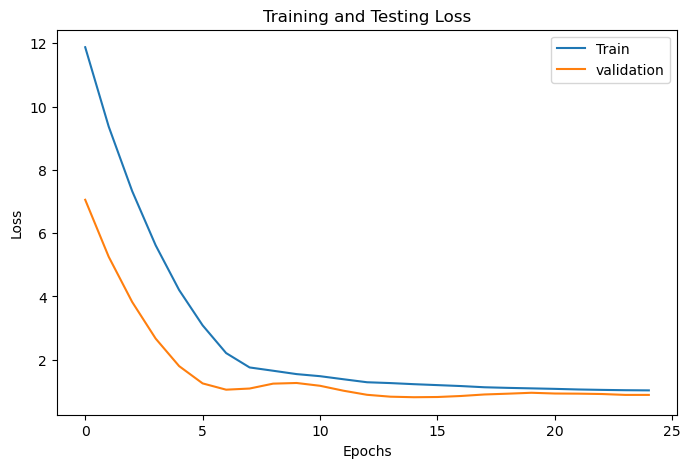

In [42]:
from tensorflow.keras.callbacks import EarlyStopping
# Building the model 

model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(64, activation='relu',
                           input_shape=(X_train.shape[1],)), #input Layer 
    
    tf.keras.layers.Dense(32, activation='relu'), # Hidden Layer
    
    tf.keras.layers.Dense(1) # output layer for regression
])

# compile the model

model.compile(optimizer='adam', loss='mean_squared_error')

# Define the callback function 
early_stopping = EarlyStopping(patience=10)

# train the model
history = model.fit(X_train, y_train, epochs=100, batch_size=32, verbose=1,validation_data=(X_test,y_test),callbacks=[early_stopping])

# Evaluating the model (using Mean Squared error)
loss = model.evaluate(X_test, y_test, verbose=0)
loss

# ploting he traning and testing loss 
import matplotlib.pyplot as plt
plt.figure(figsize=[8,5])
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Testing Loss')
plt.title('Training and Testing Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Train','validation',],loc='upper right')
plt.show()

